In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ravidussilva/real-ai-art")

print("Path to dataset files:", path)

100%|██████████| 9.95G/9.95G [02:10<00:00, 81.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5


In [ ]:
import os
import random
from matplotlib import pyplot as plt
import cv2

import numpy as np
import pandas as pd

In [ ]:
import os

top_dir = '/root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset'

# Define the training paths
train_dir = os.path.join(top_dir, 'train')

# List all directories in the train directory
all_directories = os.listdir(train_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
train_human = []
train_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        train_human.append(os.path.join(train_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        train_ai.append(os.path.join(train_dir, directory))

# Print the lists of directories
print("Train directories containing human-drawn images:")
for i, directory in enumerate(train_human):
    print(f"{i}. {directory}")

print("\nTrain directories containing AI-generated images:")
for i, directory in enumerate(train_ai):
    print(f"{i}. {directory}")

Train directories containing human-drawn images:
0. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/romanticism
1. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/expressionism
2. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/surrealism
3. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/renaissance
4. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/art_nouveau
5. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/baroque
6. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/impressionism
7. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/post_impressionism
8. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-a

In [ ]:
# Define the test paths
test_dir = os.path.join(top_dir, 'test')

# List all directories in the test directory
all_directories = os.listdir(test_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
test_human = []
test_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        test_human.append(os.path.join(test_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        test_ai.append(os.path.join(test_dir, directory))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")


Test directories containing human-drawn images:
0. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/test/romanticism
1. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/test/expressionism
2. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/test/surrealism
3. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/test/renaissance
4. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/test/art_nouveau
5. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/test/baroque
6. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/test/impressionism
7. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/test/post_impressionism
8. /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versio

In [ ]:

# Plot k-number of images from the dataset
def plot_im(directory, k):
    files = os.listdir(directory)
    im = random.choices(files, k=k)

    fig = plt.figure()

    for i in range(k):
        im_i_path = os.path.join(directory, im[i])  # File path
        im_i = cv2.imread(im_i_path)

        # Add subplot
        ax = fig.add_subplot(int(np.sqrt(k)), int(np.sqrt(k)), i + 1)

        # Plot image
        ax.imshow(im_i)
        ax.axis('off')

        # Display filename below the image
        ax.set_title(im[i], fontsize=8, pad=2)

    plt.tight_layout()  # Adjust layout
    plt.show()



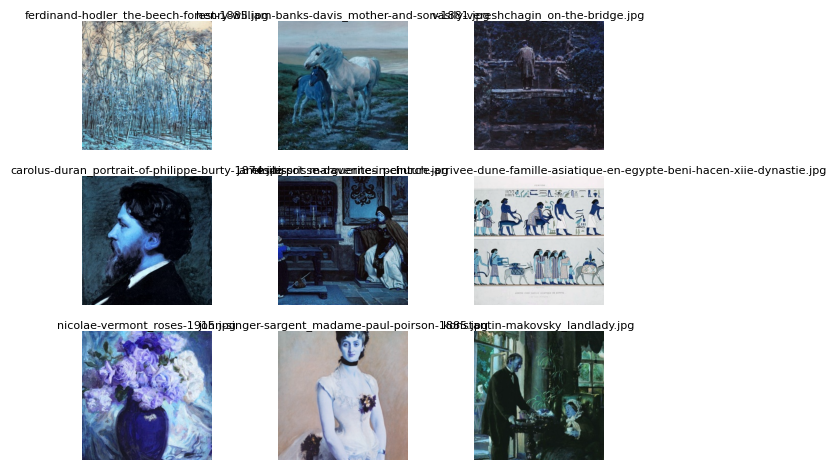

directory: /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/realism


In [ ]:
real_im = plot_im(directory=train_human[9], k=9)
print(f"directory: {train_human[9]}")
plt.show()

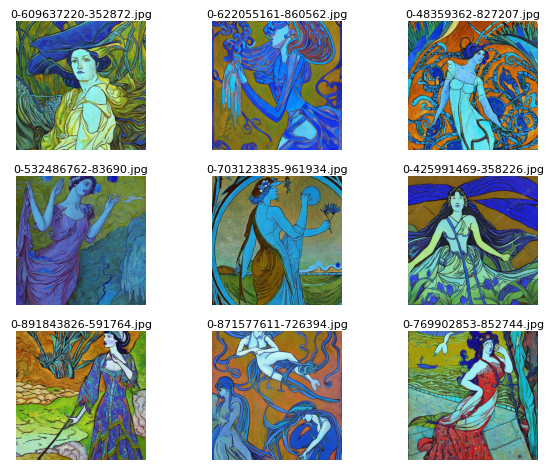

directory: /root/.cache/kagglehub/datasets/ravidussilva/real-ai-art/versions/5/Real_AI_SD_LD_Dataset/train/AI_SD_art_nouveau


In [ ]:
AI_im = plot_im(directory=train_ai[5], k=9)
print(f"directory: {train_ai[5]}")
plt.show()

In [ ]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for train_data
train_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under train_human as "human"
for directory in train_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under train_ai as "AI"
for directory in train_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

In [ ]:
print(train_data.head(10))

                                            filepath  label
0  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
1  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
2  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
3  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
4  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
5  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
6  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
7  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
8  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
9  /root/.cache/kagglehub/datasets/ravidussilva/r...  human


In [ ]:
# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       105015
human     50000
Name: count, dtype: int64


In [ ]:
# Set the random seed for reproducibility
random_seed = 100  # Change this to your desired seed number
np.random.seed(random_seed)

# Number of rows to drop for the 'AI' label
num_to_drop = 55015

# Get the indices of rows with the 'AI' label
ai_indices = train_data[train_data['label'] == 'AI'].index

# Randomly select indices to drop using the specified seed
indices_to_drop = np.random.choice(ai_indices, num_to_drop, replace=False)

# Drop the selected rows from the DataFrame
train_data = train_data.drop(indices_to_drop)

# Reset the index of the DataFrame after dropping rows
train_data.reset_index(drop=True, inplace=True)

In [ ]:
# Display the first few rows of the train_data DataFrame
print(train_data.head())

# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("\nNumber of files under each label:")
print(file_counts)

                                            filepath  label
0  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
1  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
2  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
3  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
4  /root/.cache/kagglehub/datasets/ravidussilva/r...  human

Number of files under each label:
label
human    50000
AI       50000
Name: count, dtype: int64


In [ ]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for test_data
test_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under test_human as "human"
for directory in test_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under test_ai as "AI"
for directory in test_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with test_data
test_data = pd.concat([test_data, data], ignore_index=True)

In [ ]:
# Display the first few rows of the test_data DataFrame
print(test_data.head())

# Count the number of files under each label
file_counts = test_data['label'].value_counts()

# Print the counts
print("\nNumber of files under each label:")
print(file_counts)

                                            filepath  label
0  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
1  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
2  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
3  /root/.cache/kagglehub/datasets/ravidussilva/r...  human
4  /root/.cache/kagglehub/datasets/ravidussilva/r...  human

Number of files under each label:
label
AI       20000
human    10000
Name: count, dtype: int64


## CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_datas = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='filepath',
    y_col='label',
    target_size=(32, 32),  # Smaller input size for CNN
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_datas = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='filepath',
    y_col='label',
    target_size=(32, 32),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Define the custom CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Number of classes in the dataset
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_datas,
    validation_data=test_datas,
    epochs=10,
    steps_per_epoch=len(train_datas),
    validation_steps=len(test_datas)
)


Found 100000 validated image filenames belonging to 2 classes.
Found 30000 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 464s 293ms/step - accuracy: 0.7748 - loss: 0.4495 - val_accuracy: 0.8802 - val_loss: 0.2783
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 443s 283ms/step - accuracy: 0.8617 - loss: 0.3151 - val_accuracy: 0.8938 - val_loss: 0.2552
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 423s 269ms/step - accuracy: 0.8809 - loss: 0.2765 - val_accuracy: 0.8941 - val_loss: 0.2662
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 414s 264ms/step - accuracy: 0.8894 - loss: 0.2624 - val_accuracy: 0.8893 - val_loss: 0.2730
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 410s 261ms/step - accuracy: 0.8934 - loss: 0.2535 - val_accuracy: 0.9047 - val_loss: 0.2379
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


30000/30000 ━━━━━━━━━━━━━━━━━━━━ 114s 4ms/step
Confusion Matrix:
[[18918  1082]
 [ 1778  8222]]
Classification Report:
              precision    recall  f1-score   support

          AI       0.91      0.95      0.93     20000
       human       0.88      0.82      0.85     10000

    accuracy                           0.90     30000
   macro avg       0.90      0.88      0.89     30000
weighted avg       0.90      0.90      0.90     30000



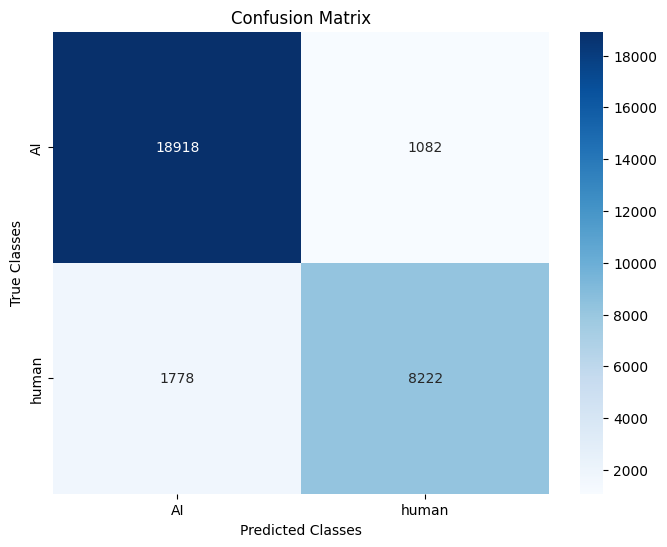

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the test data
predictions = model.predict(test_datas)

# Get the predicted classes (argmax converts probabilities to class indices)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the generator
true_classes = test_datas.classes
class_labels = list(test_datas.class_indices.keys())  # Get class labels
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(cm)
# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print("Classification Report:")
print(report)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save('CNN_model.h5')
